TEST

In [1]:
import numpy as np
m = 100
X = np.linspace(-3,3,100).reshape(100,1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [2]:
import matplotlib.pyplot as plt

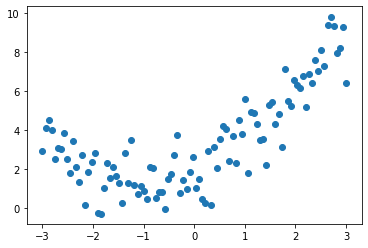

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [5]:
X[0]

array([-3.])

In [6]:
X_poly[0] ## contains X[0] and X[0]**2

array([-3.,  9.])

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_ , lin_reg.coef_

(array([1.8608131]), array([[0.99036743, 0.50733605]]))

In [8]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new) ## contains X_new[i] and X_new[i]**2
y_new = lin_reg.predict(X_new_poly)

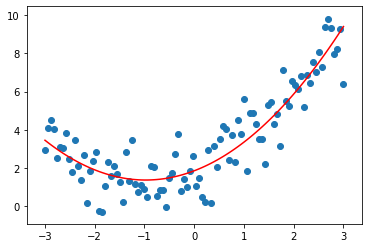

In [9]:
plt.plot(X_new,y_new,'r-')
plt.scatter(X,y)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [11]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.axis([0,80,0,3])
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors), "b-",label="val")
    plt.legend()

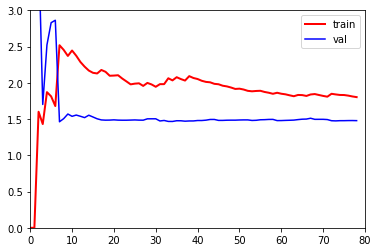

In [12]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [13]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

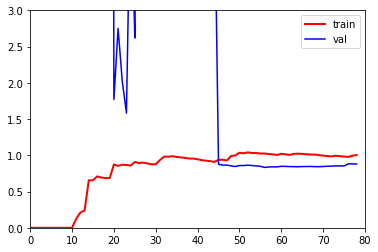

In [14]:
plot_learning_curves(polynomial_regression,X,y)

In [15]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])

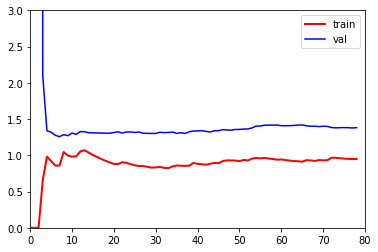

In [16]:
plot_learning_curves(polynomial_regression,X,y)